## 아래는 코로나 19 발생 후 5개월 간 온라인에서 '코로나', '마스크' 등 코로나 관련된 키워드로 검색된 횟수를 나타낸 표이다. 아래 표를 토대로 월에 따른 정보량을 예측하려고 한다.
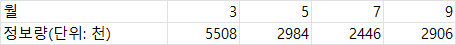

### 이 표를 보고 두 사람이 선형회귀 예측을 진행했다.

### 스클: y = -400x + 7000
### 마클: y = -420x + 6000

### 두 사람 중 오차가 적은 방정식을 제시한 사람을 찾고, 최소제곱법을 사용해 최적의 선형회귀 방정식을 제시해 보자.


In [1]:
import numpy as np

In [2]:
# 스클과 마클의 오차 파악하기
scle = [-400, 7000]
macle = [-420, 6000]

In [3]:
# 데이터 리스트 선언 data = [[x,y], ...]
data = [[3,5580],[5,2984],[7,2446],[9,2906]]
# x와 y 리스트 선언
x = [i[0] for i in data]
y = [i[1] for i in data]

In [4]:
# 일차 방정식 y = ax + b 구현
def p_scle(x):
    return scle[0]*x + scle[1]
def p_macle(x):
    return macle[0]*x + macle[1]

In [5]:
# 평균 제곱 오차 계산 함수 정의
def mse(y,y_hat):
    return (((y-y_hat) ** 2).mean())

In [6]:
# 최종값을 구하는 mse_val() 함수 정의
def mse_val(y,predict_result):
    return mse(np.array(y),np.array(predict_result))

In [7]:
# 예측 값이 들어갈 빈 리스트
predict_result_s = []
predict_result_ma = []

In [8]:
# 모든 x의 값을 한 번씩 대입 => predict_result 리스트 완성
for i in range(len(x)):
    predict_result_s.append(p_scle(x[i]))
    print("월=%.f, 정보량=%.f, 예측 정보량=%.f" %(x[i],y[i],p_scle(x[i])))

월=3, 정보량=5580, 예측 정보량=5800
월=5, 정보량=2984, 예측 정보량=5000
월=7, 정보량=2446, 예측 정보량=4200
월=9, 정보량=2906, 예측 정보량=3400


In [9]:
# 모든 x의 값을 한 번씩 대입 => predict_result 리스트 완성
for i in range(len(x)):
    predict_result_ma.append(p_macle(x[i]))    
    print("월=%.f, 정보량=%.f, 예측 정보량=%.f" %(x[i],y[i],p_macle(x[i])))

월=3, 정보량=5580, 예측 정보량=4740
월=5, 정보량=2984, 예측 정보량=3900
월=7, 정보량=2446, 예측 정보량=3060
월=9, 정보량=2906, 예측 정보량=2220


In [10]:
print(predict_result_s)
print(predict_result_ma)

[5800, 5000, 4200, 3400]
[4740, 3900, 3060, 2220]


In [11]:
# 최종 MSE 출력
print("mse_scle 최종값: "+ str(mse_val(y,predict_result_s,)))
print("mse_macle 최종값: "+ str(mse_val(y,predict_result_ma)))

mse_scle 최종값: 1858302.0
mse_macle 최종값: 598062.0


# 스클보다 마클의 오차가 적으므로 더 정확한 예측을 했다고 할 수 있다.

In [12]:
# 최소제곱법 사용해 최적화된 선형회귀 방정식 세우기
# 최소 제곱근 공식으로 기울기 a와 y 절편 b의 값 구하기
# 모든 원소의 평균 구하는 함수 mean()
mx = np.mean(x)
my = np.mean(y)

In [13]:
# 최소 제곱근 기울기 a 구하는 공식 중 분모 구하기
# 본모 = (x의 각 원소-x의 평균)^2 의 합
divisor = sum([(mx - i)**2 for i in x])

In [14]:
# 최소 제곱근 기울기 a 구하는 공식 중 분자 구하기
# 본자 = (x 편차 * y 편차)의 합

# 분자 구하는 함수 지정
def top(x,mx,y,my):
    d=0;
    for i in range(len(x)):
        d += (x[i] - mx)*(y[i] - my)
    return  d
dividend = top(x,mx,y,my)

In [15]:
# 결과 값 출력
print("분모 = ",divisor)
print("분자 = ",dividend)

분모 =  20.0
분자 =  -8560.0


In [16]:
# 기울기 구하기
a = dividend / divisor

In [17]:
# y 절편 b 구하기
b = my - (mx*a)

In [18]:
# 출력으로 확인
print("기울기 a =", a)
print("y 절편 b =", b)

기울기 a = -428.0
y 절편 b = 6047.0


## 최소 제곱법을 사용해 
# y = -428x + 6047 
## 이라는 선형회귀 방정식을 도출할 수 있다. 추가적으로 오차를 아래와 같이 구할 수 있다.

In [19]:
opti = [-428,6047]

def p_opti(x):
    return opti[0]*x + opti[1]

In [20]:
predict_result = []

In [21]:
# 모든 x의 값을 한 번씩 대입 => predict_result 리스트 완성
for i in range(len(x)):
    predict_result.append(p_opti(x[i]))    
    print("월=%.f, 정보량=%.f, 예측 정보량=%.f" %(x[i],y[i],p_opti(x[i])))

월=3, 정보량=5580, 예측 정보량=4763
월=5, 정보량=2984, 예측 정보량=3907
월=7, 정보량=2446, 예측 정보량=3051
월=9, 정보량=2906, 예측 정보량=2195


In [22]:
# 최종 MSE 출력
print("mse 최종값: "+ str(mse_val(predict_result,y)))

mse 최종값: 597741.0
